In [1]:
# bit slicing
#Import required library
import cv2
import numpy as np
from matplotlib import pyplot as plt
import urllib
import cv2

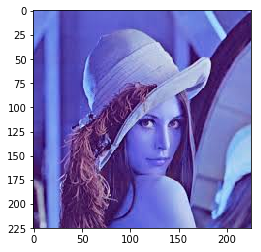

array([[[118, 134, 230],
        [118, 134, 230],
        [117, 133, 229],
        ...,
        [122, 128, 223],
        [141, 149, 242],
        [111, 118, 215]],

       [[117, 133, 229],
        [117, 133, 229],
        [117, 133, 229],
        ...,
        [138, 140, 234],
        [154, 157, 248],
        [120, 120, 214]],

       [[117, 133, 229],
        [117, 133, 229],
        [115, 133, 228],
        ...,
        [114, 109, 200],
        [113, 104, 194],
        [ 79,  63, 151]],

       ...,

       [[ 68,  31,  87],
        [ 63,  27,  87],
        [ 60,  24,  90],
        ...,
        [ 74,  51, 126],
        [ 77,  58, 139],
        [ 78,  61, 152]],

       [[ 66,  31,  87],
        [ 62,  26,  86],
        [ 59,  23,  89],
        ...,
        [ 78,  57, 136],
        [ 85,  66, 151],
        [ 77,  66, 159]],

       [[ 52,  20,  77],
        [ 67,  35,  94],
        [ 61,  25,  91],
        ...,
        [ 87,  68, 155],
        [ 89,  73, 167],
        [ 87,  73, 178]]

In [2]:
img = cv2.imread('lena.jpg')
im = cv2.imread('lena.jpg',cv2.IMREAD_GRAYSCALE)
#cv2.imshow('image',im)
plt.imshow(img, cmap = 'gray')
plt.show()
img

[[161 161 160 ... 156 176 146]
 [160 160 160 ... 168 184 148]
 [160 160 159 ... 137 132  91]
 ...
 [ 52  49  48 ...  76  84  90]
 [ 52  48  47 ...  83  94  95]
 [ 41  56  49 ...  96 103 106]]
(225, 225)
160


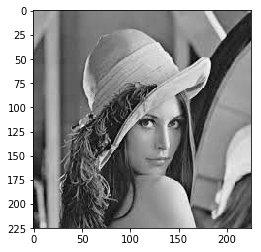

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray)
print(gray.shape)
print(gray[1][1])

plt.imshow(gray, cmap = 'gray')
plt.show()

In [4]:
def convertToBinary(my_dec):
    l=[]
    while my_dec>0:
        #print(my_dec)
        rem=my_dec%2
        my_dec=my_dec//2
        #print(my_dec)
        l.append(rem)
        #print(l)         
    l.reverse()
    new=np.zeros(8 -len(l))
    ow=np.append(new,l)
    return ow

k=convertToBinary(2)
print(k)
k=convertToBinary(200)
print(k,type(k))

[0. 0. 0. 0. 0. 0. 1. 0.]
[1. 1. 0. 0. 1. 0. 0. 0.] <class 'numpy.ndarray'>


by using above function we can convert dec to binary into a 8 bit array

In [5]:
out=[]
for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        #print(img[i][j])
        outp=convertToBinary(gray[i][j])
        out.append(outp)#appending each output(bin val of all pixels ) into a list

print(outp,outp[1])
#out

[0. 1. 1. 0. 1. 0. 1. 0.] 1.0


In [6]:
jv=np.asarray(out)#CONVERTING list into array
print(jv,jv.shape)
#print(jv[0][1],jv[1][1])

[[1. 0. 1. ... 0. 0. 1.]
 [1. 0. 1. ... 0. 0. 1.]
 [1. 0. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 1. 1. 1.]
 [0. 1. 1. ... 0. 1. 0.]] (50625, 8)


https://i2.wp.com/theailearner.com/wp-content/uploads/2019/01/bit-plane-slicing.png?w=662&ssl=1

In [11]:
from IPython.display import Image
Image(url='https://i2.wp.com/theailearner.com/wp-content/uploads/2019/01/bit-plane-slicing.png?w=662&ssl=1')

now convert array into 8 arrays by selecting one bit(like bit from first location) in each array and reshape that 

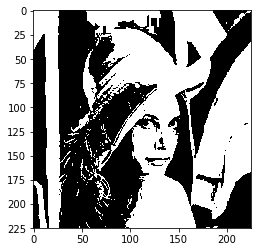

In [7]:
one = np.array([int(i[0]) for i in jv],dtype = np.uint8).reshape(img.shape[0],img.shape[1])
plt.imshow(one, cmap = 'gray')
plt.show()

In [8]:
two= np.array([int(i[1]) for i in jv],dtype = np.uint8).reshape(img.shape[0],img.shape[1])
three = np.array([int(i[2]) for i in jv],dtype = np.uint8).reshape(img.shape[0],img.shape[1])
four = np.array([int(i[3]) for i in jv],dtype = np.uint8).reshape(img.shape[0],img.shape[1])
five = np.array([int(i[4]) for i in jv],dtype = np.uint8).reshape(img.shape[0],img.shape[1])
six = np.array([int(i[5]) for i in jv],dtype = np.uint8).reshape(img.shape[0],img.shape[1])
seven= np.array([int(i[6]) for i in jv],dtype = np.uint8).reshape(img.shape[0],img.shape[1])
eight = np.array([int(i[7]) for i in jv],dtype = np.uint8) .reshape(img.shape[0],img.shape[1])
print(one,two,three)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]] [[1 1 1 ... 0 1 0]
 [1 1 1 ... 1 1 0]
 [1 1 0 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 1 1 1]]


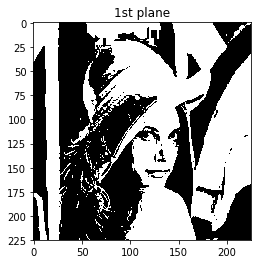

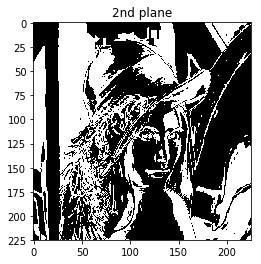

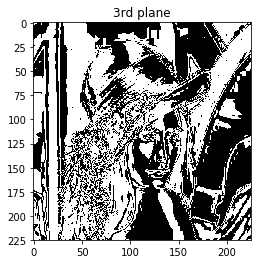

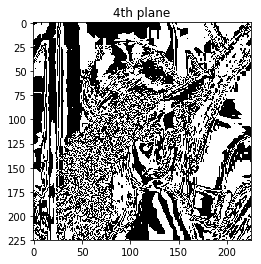

In [9]:
plt.imshow(one, cmap = 'gray')
plt.title("1st plane")
plt.show()
plt.imshow(two, cmap = 'gray')
plt.title("2nd plane")
plt.show()
plt.imshow(three, cmap = 'gray')
plt.title("3rd plane")
plt.show()
plt.imshow(four, cmap = 'gray')
plt.title("4th plane")
plt.show()

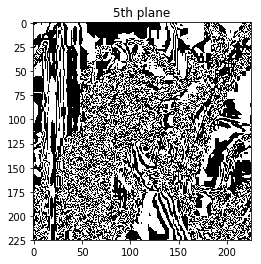

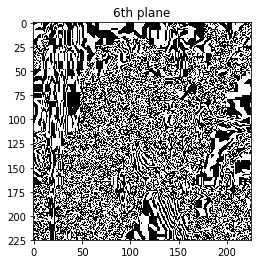

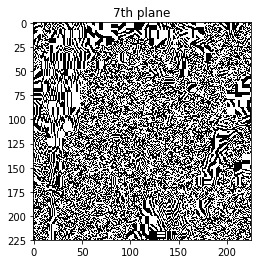

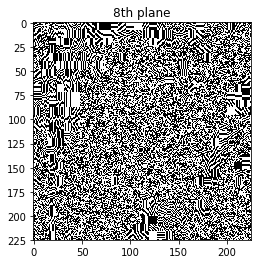

In [10]:
plt.imshow(five, cmap = 'gray')
plt.title("5th plane")
plt.show()
plt.imshow(six, cmap = 'gray')
plt.title("6th plane")
plt.show()
plt.imshow(seven, cmap = 'gray')
plt.title("7th plane")
plt.show()
plt.imshow(eight, cmap = 'gray')
plt.title("8th plane")
plt.show()